In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
inputpath = './input/'

In [3]:
train_df = pd.read_csv(inputpath+'train.csv')
test_df = pd.read_csv(inputpath+'test.csv')
gender_df = pd.read_csv(inputpath+'gender_submission.csv')

print(train_df.shape)
print(test_df.shape)
print(gender_df.shape)

train_index = train_df.shape[0]
print('train_index: ' + str(train_index))

(891, 12)
(418, 11)
(418, 2)
train_index: 891


In [4]:
# check the data
print(train_df.head())
print('================')
print(test_df.head())
print('================')
print(gender_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [5]:
# join test_df and genger_df (test dataset) for future process
test_df_joined = test_df.join(gender_df.set_index('PassengerId'), on='PassengerId')
print(test_df_joined.shape)
# expect (418,12)
print(test_df_joined.head()) 

(418, 12)
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Survived  
0  34.5      0      0   330911   7.8292   NaN        Q         0  
1  47.0      1      0   363272   7.0000   NaN        S         1  
2  62.0      0      0   240276   9.6875   NaN        Q         0  
3  27.0      0      0   315154   8.6625   NaN        S         0  
4  22.0      1      1  3101298  12.2875   NaN        S         1  


count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

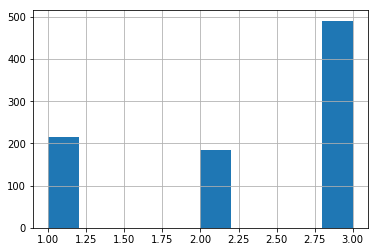

In [6]:
train_df['Pclass'].hist()
train_df['Pclass'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

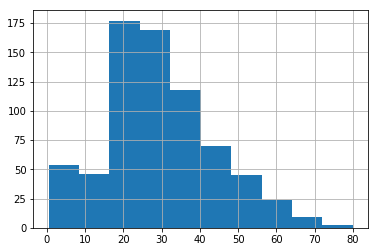

In [7]:
train_df['Age'].hist()
train_df['Age'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

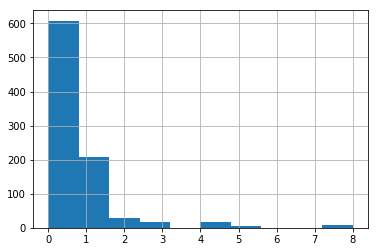

In [8]:
train_df['SibSp'].hist()
train_df['SibSp'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

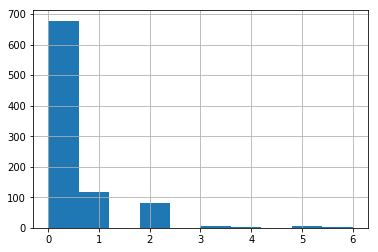

In [9]:
train_df['Parch'].hist()
train_df['Parch'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

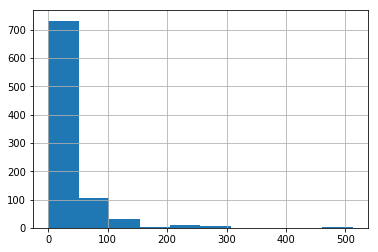

In [10]:
train_df['Fare'].hist()
train_df['Fare'].describe()

In [11]:
total_df = train_df.append(test_df_joined)
print(total_df.shape)
#(1309, 12)

(1309, 12)


C:\Users\woare\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [12]:
# check the nan data
total_df.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived          0
Ticket            0
dtype: int64

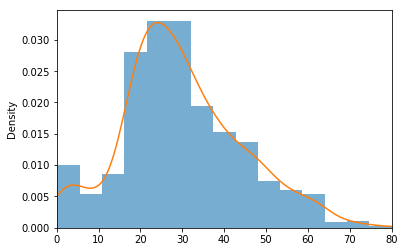

In [13]:
# find the replaceable data for the nan in the age.
# check the current data
ax = total_df["Age"].hist(bins=15, density=True, stacked=True, alpha=0.6)
total_df["Age"].plot(kind='density')
plt.xlim(0, total_df.Age.max())
plt.show()

In [14]:
# The data is skewed. the nan will be replace with median.
age_replace = total_df["Age"].median()
print(age_replace)

28.0


In [15]:
# find the replaceable data for the nan in the Embarked.
total_df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [16]:
embarked_replace = total_df.Embarked.value_counts().idxmax()
print(embarked_replace)

S


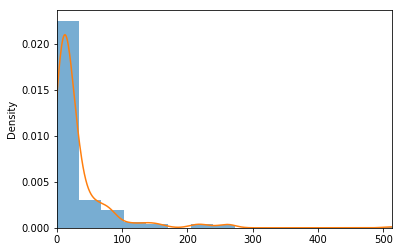

In [17]:
# find the replaceable data for the nan in the Fare.
# check the current data
ax = total_df.Fare.hist(bins=15, density=True, stacked=True, alpha=0.6)
total_df.Fare.plot(kind='density')
plt.xlim(0, total_df.Fare.max())
plt.show()

In [18]:
fare_replace = total_df.Fare.median()
print(fare_replace)

14.4542


In [19]:
# fill nan data to replace value
total_df.Age.fillna(age_replace, inplace=True)
total_df.Embarked.fillna(embarked_replace, inplace=True)
total_df.Fare.fillna(fare_replace, inplace=True)

total_df.isnull().sum()

Age               0
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived          0
Ticket            0
dtype: int64

In [20]:
'''
define filler function for data.

Change Sex col. male to 1, female to 0
change embarked col. C,Q,S to 0,1,2

''' 
def SE_filter(df):
    for row_index, value in df.iterrows():
        # Change Sex col. male to 1, female to 0
        if value.Sex == 'male':
            df.at[row_index, 'Sex'] = 1
        elif value.Sex == 'female':
            df.at[row_index, 'Sex'] = 0
        
        # change embarked col. C,Q,S to 0,1,2
        if value.Embarked == 'C':
            df.at[row_index, 'Embarked'] = 0
        elif value.Embarked == 'Q':
            df.at[row_index, 'Embarked'] = 1
        elif value.Embarked == 'S':
            df.at[row_index, 'Embarked'] = 2
    
    df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
        
    return df

In [21]:
# replace Sex and Embarked to number
# drop 'PassengerId', 'Name', 'Ticket', 'Cabin'
total_df = SE_filter(total_df)

# print(total_df.Sex)
# print(total_df.Embarked)

In [22]:
total_df_y = total_df.Survived.copy()
total_df_x = total_df.drop(columns=['Survived'])

print(total_df_y.shape)
print(total_df_x.shape)

(1309,)
(1309, 7)


In [23]:
total_df_x.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp
0,22.0,1,7.2500,0,3,1,1
1,38.0,2,71.2833,0,1,0,1
2,26.0,1,7.9250,0,3,1,0
3,35.0,2,53.1000,0,1,1,1
4,35.0,2,8.0500,0,3,0,0


In [24]:
# data normailzation
total_df_x_norm = (total_df_x - total_df_x.mean())/total_df_x.std()

total_df_x_norm.mean()

Age         3.835740e-17
Embarked    2.317135e-16
Fare       -6.679997e-16
Parch      -5.920059e-17
Pclass     -4.829343e-16
Sex         1.969395e-16
SibSp       2.178887e-16
dtype: float64

In [25]:
total_df_x_norm.std()**2

Age         1.0
Embarked    1.0
Fare        1.0
Parch       1.0
Pclass      1.0
Sex         1.0
SibSp       1.0
dtype: float64

In [26]:
total_df_x_norm.dtypes

Age         float64
Embarked     object
Fare        float64
Parch       float64
Pclass      float64
Sex          object
SibSp       float64
dtype: object

In [27]:
# change object type to number type
total_df_x_norm.Embarked = pd.to_numeric(total_df_x_norm.Embarked)
total_df_x_norm.Sex = pd.to_numeric(total_df_x_norm.Sex)
total_df_x_norm.dtypes

Age         float64
Embarked    float64
Fare        float64
Parch       float64
Pclass      float64
Sex         float64
SibSp       float64
dtype: object

In [28]:
# datafram to numpy array
total_x = total_df_x_norm.values
total_y = total_df_y.values

print(total_x.shape)
print(type(total_x))
print(total_x.dtype)
print('-----------')
print(total_y.shape)
print(type(total_y))
print(total_y.dtype)

(1309, 7)
<class 'numpy.ndarray'>
float64
-----------
(1309,)
<class 'numpy.ndarray'>
int64


In [29]:
# save the data
np.save(inputpath+'total_x', total_x)
np.save(inputpath+'total_y', total_y)

# load the data
loaded_x = np.load(inputpath+'total_x.npy')
loaded_y = np.load(inputpath+'total_y.npy')

print(loaded_x.shape)
print(loaded_y.shape)

(1309, 7)
(1309,)


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as utils
from torch.autograd import Variable
from sklearn import metrics
from sklearn.decomposition import PCA

In [31]:
# load the data
inputpath = './input/'
train_index = 891
loaded_x = np.load(inputpath+'total_x.npy')
loaded_y = np.load(inputpath+'total_y.npy')

lr_loaded_x = loaded_x

print(loaded_x.shape)
print(loaded_y.shape)

(1309, 7)
(1309,)


In [32]:
# sprit the data for PCA fit
train_x = loaded_x[:train_index, :]
train_x.shape

(891, 7)

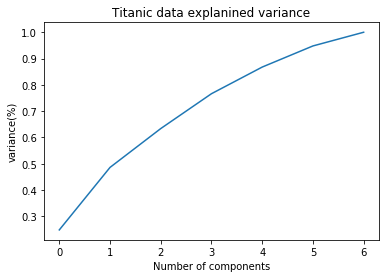

In [33]:
# check how many components could be reduced.
pca = PCA().fit(train_x)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('variance(%)')
plt.title('Titanic data explanined variance')
plt.show()

In [34]:
# to catch close to 99% and more than 90%. therefore k = 6
k = 6
pca = PCA(n_components=k)

# train with train data and apply to all data.
pca.fit(train_x)
pca_loaded_x = pca.transform(loaded_x)
pca_loaded_x.shape

(1309, 6)

In [35]:
def data_dataloader(data, label, train_index):
    
    dev_index = int(np.float(train_index * 0.85))
    
    # split data to train and test set
    train_data = data[:train_index,:]
    train_label = label[:train_index]
    dev_data = train_data[dev_index:,:]
    dev_label = train_label[dev_index:]
    test_data = data[train_index:,:]
    test_label = label[train_index:]
    
    '''
    print(train_data.shape)
    print(train_label.shape)
    print(dev_data.shape)
    print(dev_label.shape)
    print(test_data.shape)
    print(test_label.shape)
    '''
    
    # np_array to tensor
    train_data, train_label = torch.Tensor(train_data), torch.Tensor(train_label)
    dev_data, dev_label = torch.Tensor(dev_data), torch.Tensor(dev_label)
    test_data, test_label = torch.Tensor(test_data), torch.Tensor(test_label)
    
    # tensor to dataset
    train_dataset = utils.TensorDataset(train_data, train_label)
    dev_dataset = utils.TensorDataset(dev_data, dev_label)
    test_dataset = utils.TensorDataset(test_data, test_label)
    
    # dataset to dataloader
    train_dataloader = utils.DataLoader(train_dataset)
    dev_dataloader = utils.DataLoader(dev_dataset)
    test_dataloader = utils.DataLoader(test_dataset)
    
    return train_dataloader, dev_dataloader, test_dataloader

In [36]:
# take data and produce dataloaders
lr_train_dataloader, lr_dev_dataloader, lr_test_dataloader = data_dataloader(lr_loaded_x, loaded_y, train_index=train_index)
pca_train_dataloader, pca_dev_dataloader, pca_test_dataloader = data_dataloader(pca_loaded_x, loaded_y, train_index=train_index)

In [37]:
# set variables 
lr_input_size = lr_loaded_x.shape[1]
pca_input_size = pca_loaded_x.shape[1]
output_size = 1
num_epochs = 5
learning_rate = 0.1

In [38]:
# create the model for Logistic Regression 
class LogisticRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        return F.sigmoid(self.linear(x))

In [39]:
# set model, criterion, and optimizer.
lr_model = LogisticRegression(lr_input_size, output_size)
pca_model = LogisticRegression(pca_input_size, output_size)

criterion = nn.BCELoss()
lr_optimizer = torch.optim.SGD(lr_model.parameters(), lr=learning_rate)
pca_optimizer = torch.optim.SGD(pca_model.parameters(), lr=learning_rate)


In [40]:
def train(model, num_epochs, criterion, optimizer, train_dataloader, dev_dataloader, test_dataloader):
    for epoch in range(num_epochs):
        for i, (train_data, train_label) in enumerate(train_dataloader):

            y_pred = model(train_data)

            loss = criterion(y_pred, train_label)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    correct = 0
    total = 0

    for dev_data, dev_label in dev_dataloader:

        output = model(dev_data)
        output = output.round()
        total += dev_label.size(0)
        correct += (output == dev_label).sum()

    print('In the Dev, Accuracy: {:.4f}%, correct: {}, total: {}'.format((100 * correct.item() / total), correct, total))


    correct = 0
    total = 0

    outputs, labels = [], []


    for test_data, test_label in test_dataloader:

        output = model(test_data)
        output = output.round()
        total += test_label.size(0)
        correct += (output == test_label).sum()

        outputs.append(output.item())
        labels.append(test_label.item())
        
    precision = metrics.average_precision_score(labels, outputs)
    recall = metrics.recall_score(labels, outputs)

    print('In the test, Accuracy: {:.4f}%, Precision: {:.4f}%, recall: {:.4f}%, correct: {}, total: {}'.format((100 * correct.item() / total), precision, recall, correct, total))
    
    return outputs, labels

In [41]:
print('----in pure Logistic_Regression----')
lr_outputs, lr_labels = train(lr_model, num_epochs, criterion, lr_optimizer, lr_train_dataloader, lr_dev_dataloader, lr_test_dataloader)
print('----in Logistic_Regression with PCA----')
pca_outputs, pca_labels = train(pca_model, num_epochs, criterion, pca_optimizer,  pca_train_dataloader, pca_dev_dataloader, pca_test_dataloader)

outputs = []
labels = []

outputs.append(np.asarray(lr_outputs))
outputs.append(np.asarray(pca_outputs))
outputs = np.asarray(outputs)

labels.append(np.asarray(lr_labels))
labels.append(np.asarray(pca_labels))
labels = np.asarray(labels)

----in pure Logistic_Regression----


C:\Users\woare\Anaconda3\lib\site-packages\torch\nn\functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
C:\Users\woare\Anaconda3\lib\site-packages\torch\nn\functional.py:1594: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


In the Dev, Accuracy: 82.8358%, correct: 111, total: 134
In the test, Accuracy: 82.2967%, Precision: 0.6610%, recall: 0.7632%, correct: 344, total: 418
----in Logistic_Regression with PCA----
In the Dev, Accuracy: 82.8358%, correct: 111, total: 134
In the test, Accuracy: 83.9713%, Precision: 0.6876%, recall: 0.8026%, correct: 351, total: 418


In [42]:
def plot_roc_and_auc_score(outputs, labels, title):
    
    # plot for LR
    lr_false_positive_rate, lr_true_positive_rate, threshold = metrics.roc_curve(labels[0], outputs[0])
    lr_auc_score = metrics.roc_auc_score(labels[0], outputs[0])
    plt.plot(lr_false_positive_rate, lr_true_positive_rate, label = 'Pure LR, AREA = {:.4f}'.format(lr_auc_score))
    
    # plot for PCA
    pca_false_positive_rate, pca_true_positive_rate, threshold = metrics.roc_curve(labels[1], outputs[1])
    pca_auc_score = metrics.roc_auc_score(labels[1], outputs[1])
    plt.plot(pca_false_positive_rate, pca_true_positive_rate, label = 'LR w PCA, AREA = {:.4f}'.format(pca_auc_score))
    
    
    plt.plot([0,1], [0,1], 'red')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.axis([0, 1, 0, 1])
    plt.title(title)
    plt.legend(loc = 'lower right')
    plt.show()

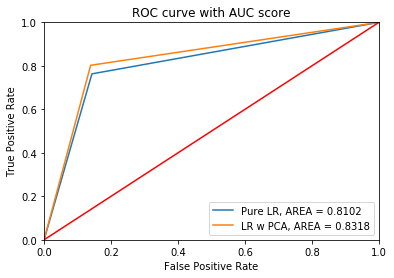

In [43]:
plot_roc_and_auc_score(outputs, labels, title = 'ROC curve with AUC score')